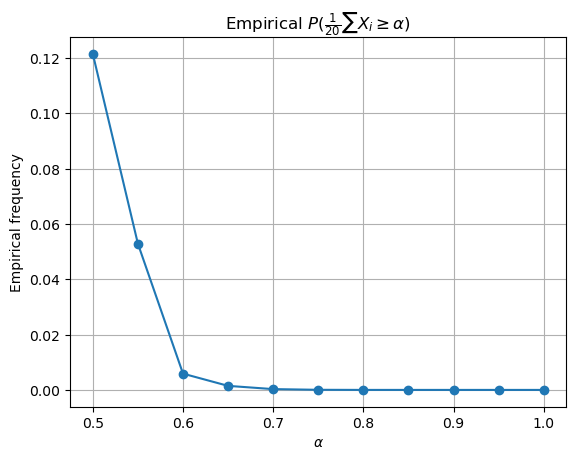

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parametre
n_reps = 1_000_000
n = 20
p = 0.35

# simulering
samples = np.random.binomial(1, p, size=(n_reps, n))
means = samples.mean(axis=1)

# alpha-værdier
alpha_values = np.arange(0.5, 1.01, 0.05)

# beregn empirisk frekvens
freqs = [(means >= alpha_values).mean() for alpha_values in alpha_values]

# plot
plt.plot(alpha_values, freqs, marker="o")
plt.xlabel(r"$\alpha$")
plt.ylabel("Empirical frequency")
plt.title(r"Empirical $P(\frac{1}{20}\sum X_i \geq \alpha)$")
plt.grid(True)
plt.show()


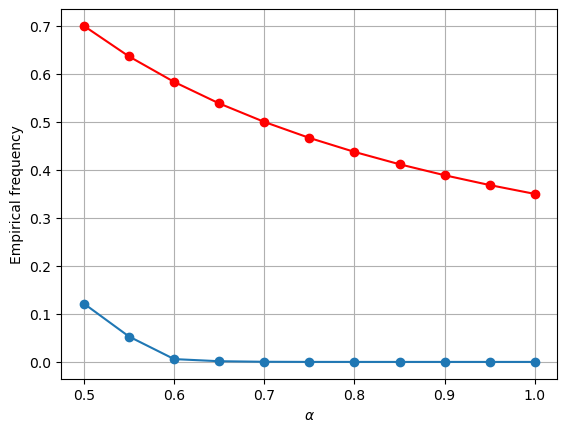

In [2]:
def markovs_inquality(x, alpha):
    return x/alpha

markov_var = markovs_inquality(p, alpha_values)

# plot
plt.plot(alpha_values, freqs, marker="o")
plt.plot(alpha_values, markov_var, marker="o", color='red', label="Markov's Inequality")
plt.xlabel(r"$\alpha$")
plt.ylabel("Empirical frequency")
plt.grid(True)
plt.show()

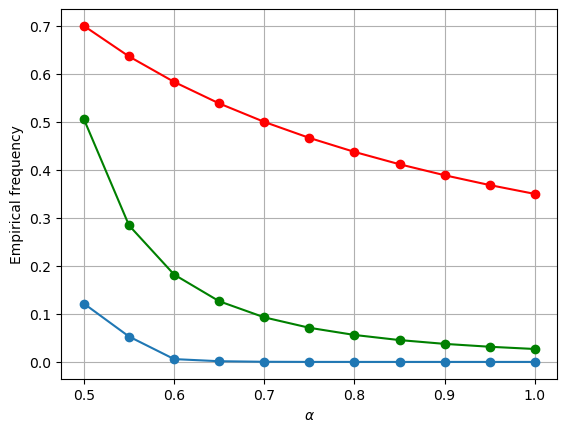

In [3]:
def chebyshevs_inequality(var, n, epsilon):
    return var / (n * (epsilon ** 2))

variance_sample = np.var(samples)

chebyshevs_var = chebyshevs_inequality(variance_sample, n, alpha_values - p)

# plot
plt.plot(alpha_values, freqs, marker="o")
plt.plot(alpha_values, markov_var, marker="o", color='red')
plt.plot(alpha_values, chebyshevs_var, marker="o", color='green')
plt.xlabel(r"$\alpha$")
plt.ylabel("Empirical frequency")
plt.grid(True)
plt.show()

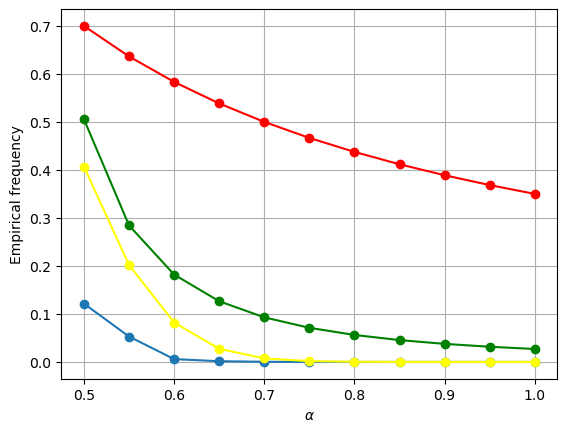

In [4]:
hoeffding_var = np.exp(-2 * n * np.maximum(0, alpha_values - p)**2)

# plot
plt.plot(alpha_values, freqs, marker="o")
plt.plot(alpha_values, markov_var, marker="o", color='red')
plt.plot(alpha_values, chebyshevs_var, marker="o", color='green')
plt.plot(alpha_values, hoeffding_var, marker="o", color='yellow')
plt.plot()
plt.xlabel(r"$\alpha$")
plt.ylabel("Empirical frequency")
plt.grid(True)
plt.show()

In [8]:
import numpy as np
from scipy.stats import binom

n, p = 20, 0.35
alphas = np.arange(0.5, 1.01, 0.05)

# Én linje, vektoriseret:
probs_exact = binom.sf(np.ceil(n*alphas).astype(int) - 1, n, p)
print(probs_exact)


[1.21780586e-01 5.31666144e-02 6.01526996e-03 1.52066179e-03
 3.10574970e-04 4.99408871e-05 6.08419035e-06 5.27685791e-07
 2.90251256e-08 7.60958350e-10 0.00000000e+00]


In [ ]:
from scipy.stats import binom

p = 0.35
n = 20

prob_alpha1 = binom.sf(19, n, p)
prob_alpha095 = binom.sf(18, n, p)

print("P(S/20 >= 1) =", prob_alpha1)
print("P(S/20 >= 0.95) =", prob_alpha095)


P(S/20 >= 1) = 7.609583501588048e-10
P(S/20 >= 0.95) = 2.9025125641771556e-08
